# 图像基础

导入相应的包：

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

## 导入图像

我们首先导入上面的图像，注意 `matplotlib` 默认只支持 `PNG` 格式的图像，我们可以使用 `mpimg.imread` 方法读入这幅图像：

In [7]:
img = mpimg.imread('stinkbug.png')

In [8]:
img.shape

(375, 500, 3)

这是一个 `375 x 500 x 3` 的 `RGB` 图像，并且每个像素使用 uint8 分别表示 `RGB` 三个通道的值。不过在处理的时候，`matplotlib` 将它们的值归一化到 `0.0~1.0` 之间：

In [9]:
img.dtype

dtype('float32')

## 显示图像

使用 `plt.imshow()` 可以显示图像：

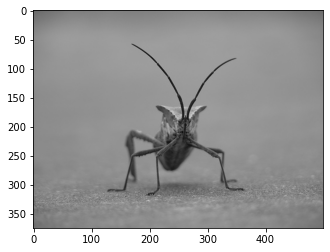

In [13]:
imgplot = plt.imshow(img)

## 伪彩色图像

从单通道模拟彩色图像：

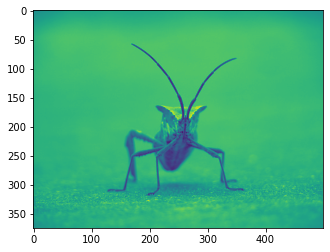

In [14]:
lum_img = img[:,:,0]
imgplot = plt.imshow(lum_img)

## 改变 colormap

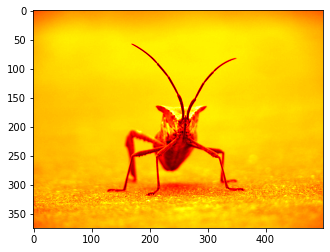

In [15]:
imgplot = plt.imshow(lum_img)
imgplot.set_cmap('hot')

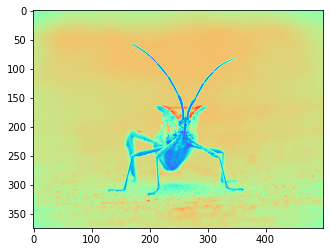

In [17]:
imgplot = plt.imshow(lum_img)
imgplot.set_cmap('rainbow')

显示色度条：

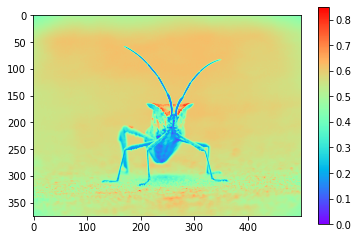

In [18]:
imgplot = plt.imshow(lum_img)
imgplot.set_cmap('rainbow')
plt.colorbar()

## 限制显示范围

先查看直方图：

(array([2.000e+00, 2.000e+00, 3.000e+00, 3.000e+00, 2.000e+00, 2.000e+00,
        3.000e+00, 1.000e+00, 7.000e+00, 9.000e+00, 7.000e+00, 2.000e+00,
        7.000e+00, 1.000e+01, 1.100e+01, 1.500e+01, 1.400e+01, 2.700e+01,
        2.100e+01, 2.400e+01, 1.400e+01, 3.100e+01, 2.900e+01, 2.800e+01,
        2.400e+01, 2.400e+01, 4.000e+01, 2.600e+01, 5.200e+01, 3.900e+01,
        5.700e+01, 4.600e+01, 8.400e+01, 7.600e+01, 8.900e+01, 8.000e+01,
        1.060e+02, 1.130e+02, 1.120e+02, 9.000e+01, 1.160e+02, 1.090e+02,
        1.270e+02, 1.350e+02, 9.800e+01, 1.310e+02, 1.230e+02, 1.110e+02,
        1.230e+02, 1.160e+02, 1.010e+02, 1.170e+02, 1.000e+02, 1.010e+02,
        9.000e+01, 1.060e+02, 1.260e+02, 1.040e+02, 1.070e+02, 1.110e+02,
        1.380e+02, 1.000e+02, 1.340e+02, 1.210e+02, 1.400e+02, 1.320e+02,
        1.390e+02, 1.160e+02, 1.330e+02, 1.180e+02, 1.080e+02, 1.170e+02,
        1.280e+02, 1.200e+02, 1.210e+02, 1.100e+02, 1.160e+02, 1.180e+02,
        9.700e+01, 9.700e+01, 1.140e+0

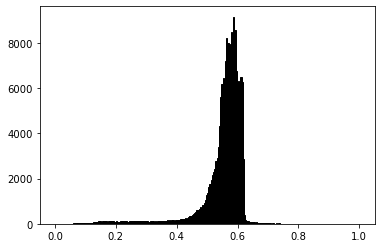

In [21]:
plt.hist(lum_img.flatten(), 256, range=(0,1), fc='k', ec='k')

将显示范围设为 `0.0-0.7`：

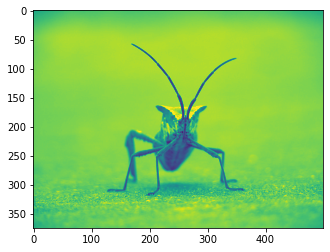

In [24]:
imgplot = plt.imshow(lum_img)
imgplot.set_clim(0,0.7)

## resize 操作

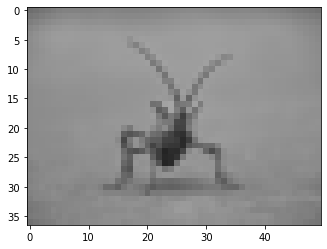

In [27]:
from PIL import Image
img = Image.open('./stinkbug.png')
rsize = img.resize((img.size[0]//10, img.size[1]//10))
rsizeArr = np.asarray(rsize)
imgplot = plt.imshow(rsizeArr)

上面我们将这个图像使用 PIL 的 `Image` 对象导入，并将其 `resize` 为原来的 1/100，可以看到很多细节都丢失了。

在画图时，由于画面的大小与实际像素的大小可能不一致，所以不一致的地方会进行插值处理，尝试一下不同的插值方法：

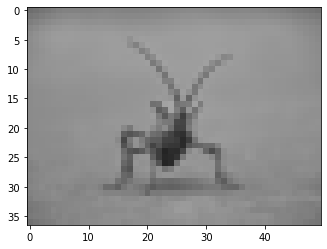

In [29]:
imgplot = plt.imshow(rsizeArr)
imgplot.set_interpolation('nearest')

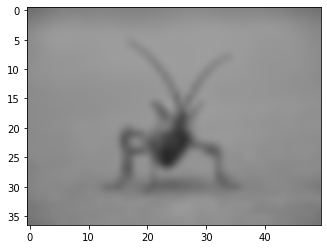

In [30]:
imgplot = plt.imshow(rsizeArr)
imgplot.set_interpolation('bicubic')